# Cellphone Price Prediction

## Project Member's Name : 

  #####  1. Logeshwary Selvaraj 
  
  #####  2. Kishore Kumar S 
  
  #####  3. Bharath K 
  
  #####  4. Nawaz Hussain Z 


## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 21)

## 2. Importing And Understanding Our Dataset

In [2]:
df = pd.read_csv('datasets_11167_15520_train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


###  ~  Shape of dataset :

In [5]:
df.shape

(2000, 21)

### ~  Dataset Information :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### ~  Finding the duplicate values :

In [7]:
df.loc[df.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


### ~  Finding the Null Values :


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### ~  Statistical Measure of the data :

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [11]:
df.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [12]:
df.px_width.describe()

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

In [13]:
df.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [14]:
df.sc_w.describe() 

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [15]:
df.blue.unique()

array([0, 1], dtype=int64)

In [16]:
df.dual_sim.unique() 

array([0, 1], dtype=int64)

In [17]:
df.n_cores.unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

In [18]:
df.wifi.unique()

array([1, 0], dtype=int64)

In [19]:
df.touch_screen.unique()

array([0, 1], dtype=int64)

In [20]:
df.three_g.unique() 

array([0, 1], dtype=int64)

In [21]:
df.sc_w.mean()               

5.767

### ~  Check Unique Values for each variable :

In [22]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# 3. Data Handling

In [23]:
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

Number of phones with sc_w = 0: 180


In [24]:
sc_w_mean = df.sc_w.mean()
df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)

In [25]:
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with px_height = 0: 2


In [26]:
px_height_mean = df.px_height.mean()
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

### ~  Price Range Distribution

######  Checking whether the data is Balanced :

In [27]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# 4. Exploratory Data Analysis (EDA) :

### ~  Analysing the Cellphone Price Range (Target Variable) :

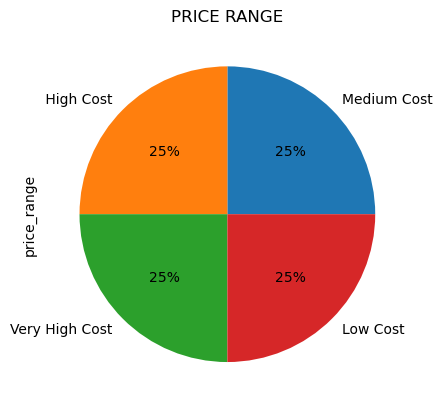

In [28]:
ax = df['price_range'].value_counts().plot(kind='pie',autopct='%1.0f%%',
                                           labels=['Medium Cost',' High Cost','Very High Cost','Low Cost'])
ax.set_title('PRICE RANGE')
plt.show()

In [29]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

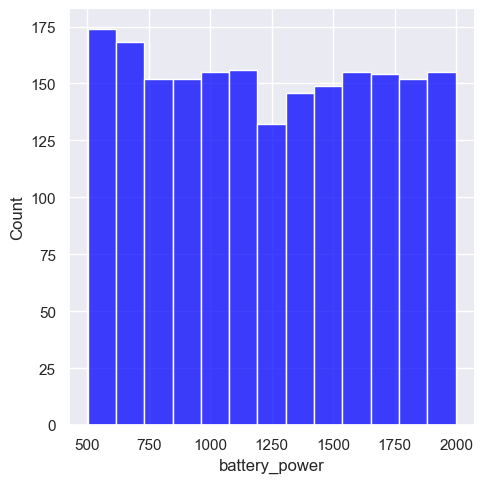

In [30]:
sns.set(rc={'figure.figsize':(15,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()

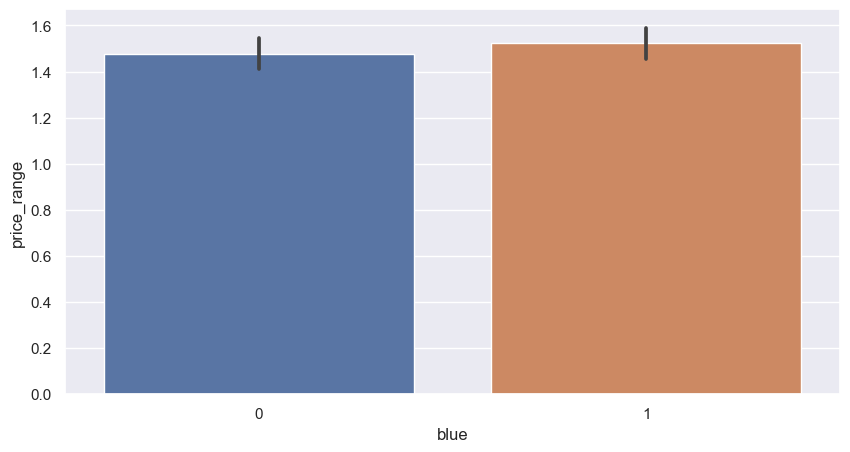

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()

### ~  Clock_speed based on price_range :

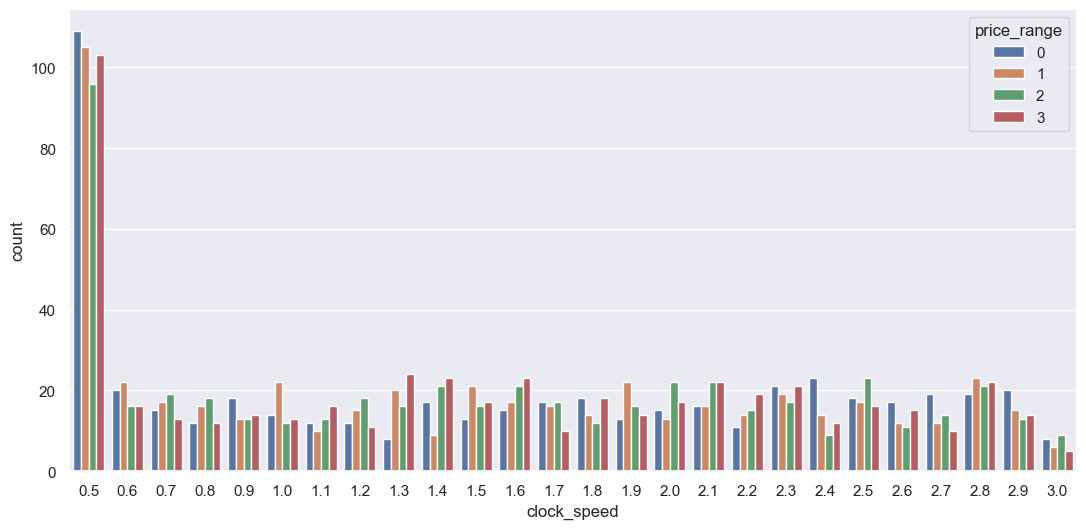

In [32]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['clock_speed'], hue ="price_range", data=df) 
plt.show()

### ~  Group the data by price range and dual sim, and count the number of devices in each group :

In [33]:
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()
sim_count

price_range  dual_sim
0            0           250
             1           250
1            0           245
             1           255
2            0           251
             1           249
3            0           235
             1           265
Name: dual_sim, dtype: int64

In [34]:
sim_count1 = sim_count.unstack()
sim_count1

dual_sim,0,1
price_range,,
0,250,250
1,245,255
2,251,249
3,235,265


### ~  Number of Dual SIM Devices based on Price Range :

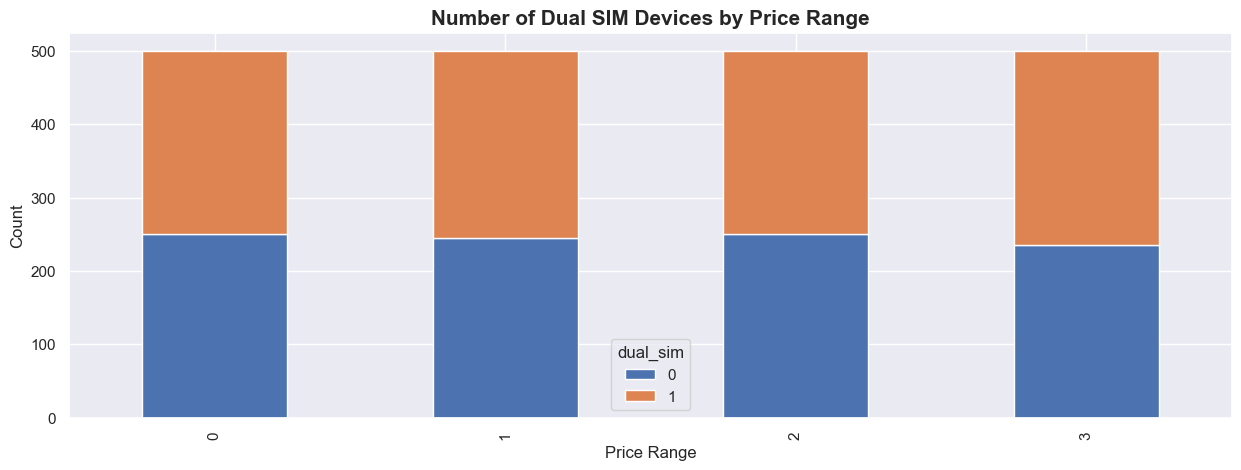

In [35]:
# Plot a stacked bar chart of the dual sim count for each price range
sim_count1.plot(kind='bar', stacked=True)

# Add axis labels and a title   

plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Number of ram based on price_range :

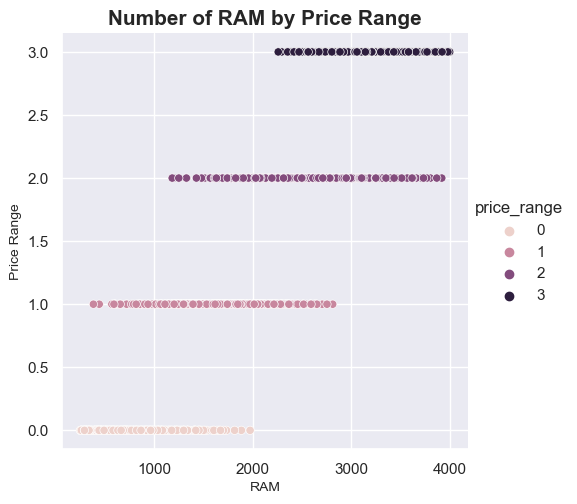

In [36]:
sns.relplot(data=df, x="ram", y="price_range", hue="price_range")
plt.xlabel("RAM", fontsize=10)
plt.ylabel("Price Range", fontsize=10)
plt.title('Number of RAM by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Pixel Width based on price_range :

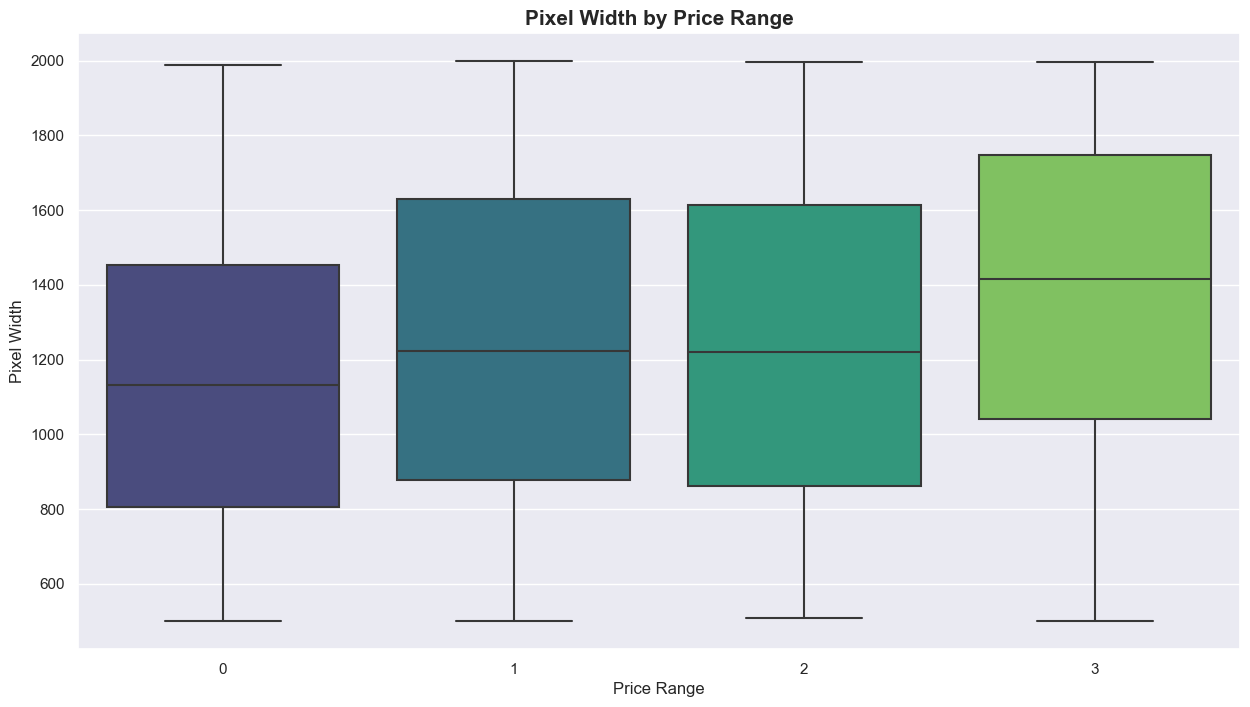

In [37]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Pixel Width')
ax.set_title('Pixel Width by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Pixel Height based on price_range :

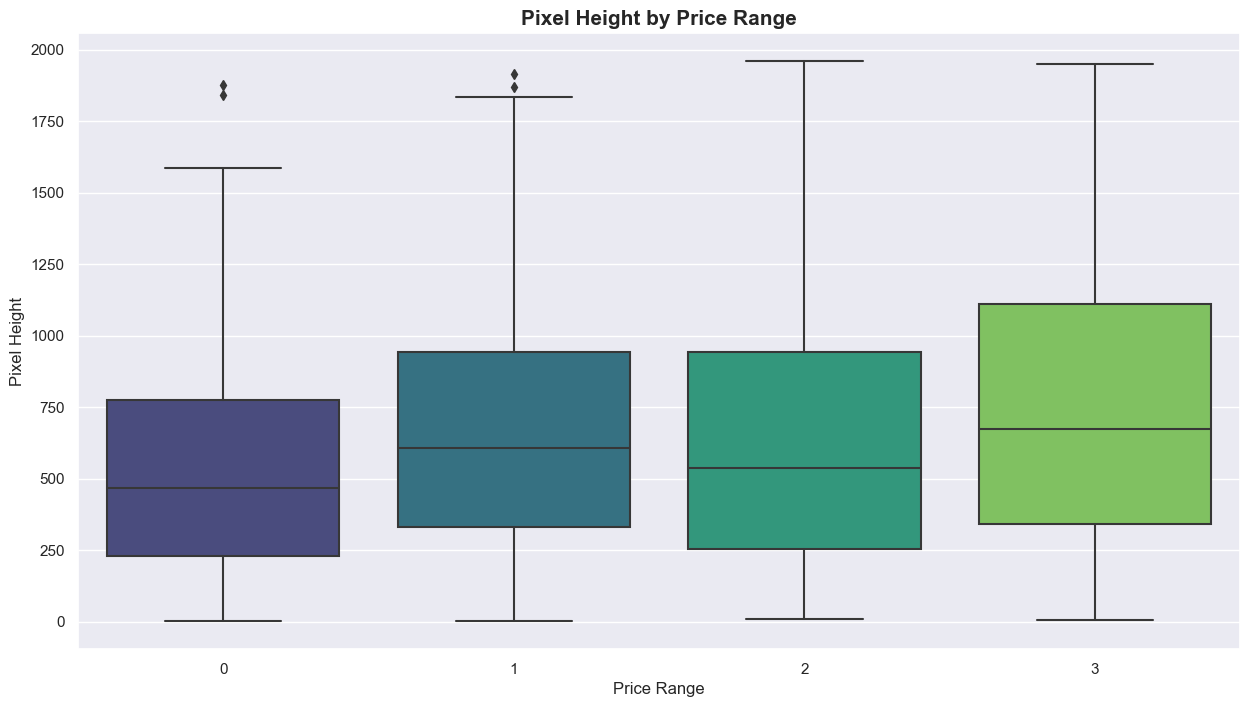

In [38]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Pixel Height')
ax.set_title('Pixel Height by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Front Camera based on price_range :

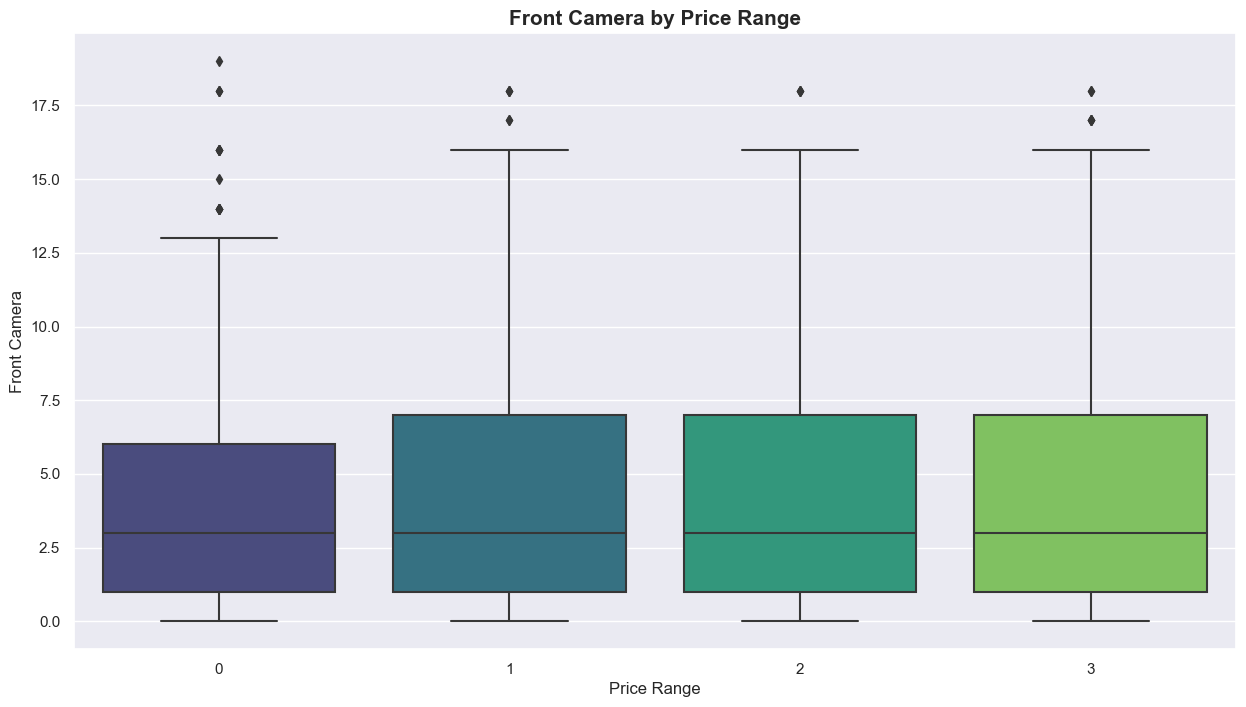

In [39]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='fc', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Front Camera')
ax.set_title('Front Camera by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Primary Camera Mega Pixel based on Price Range :

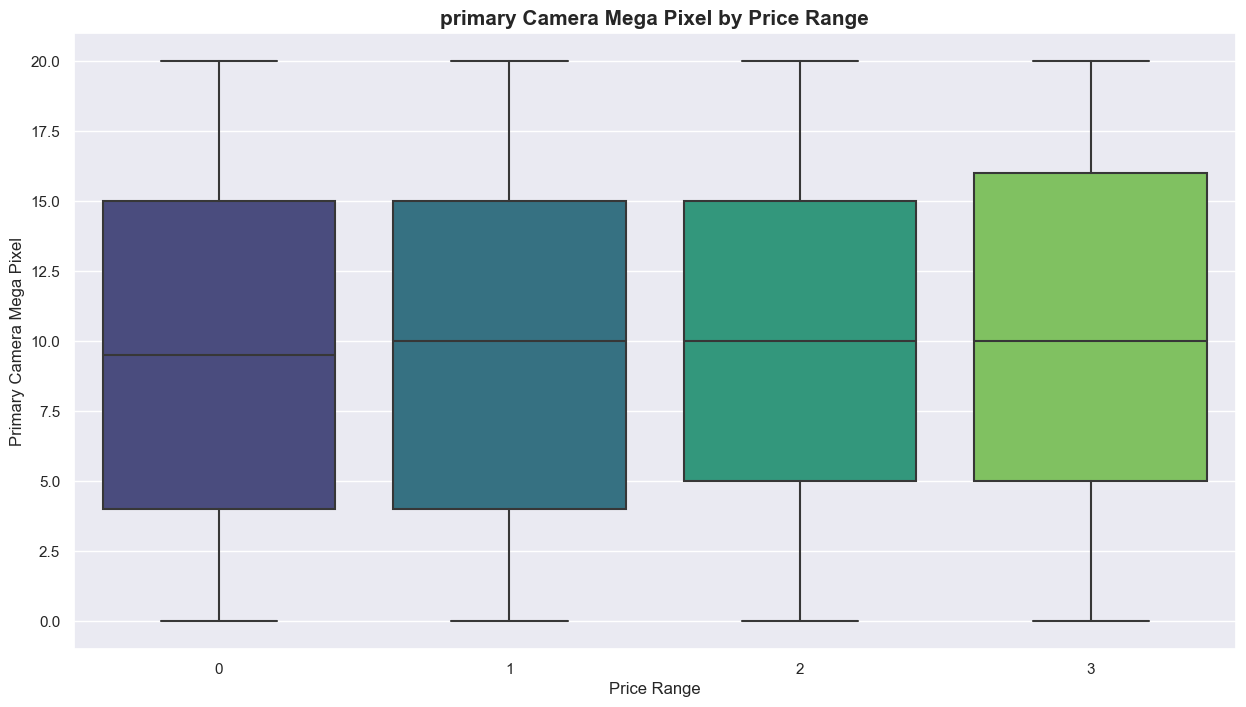

In [40]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='pc', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Primary Camera Mega Pixel')
ax.set_title('primary Camera Mega Pixel by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Number of Cores of Processor based on Price Range :

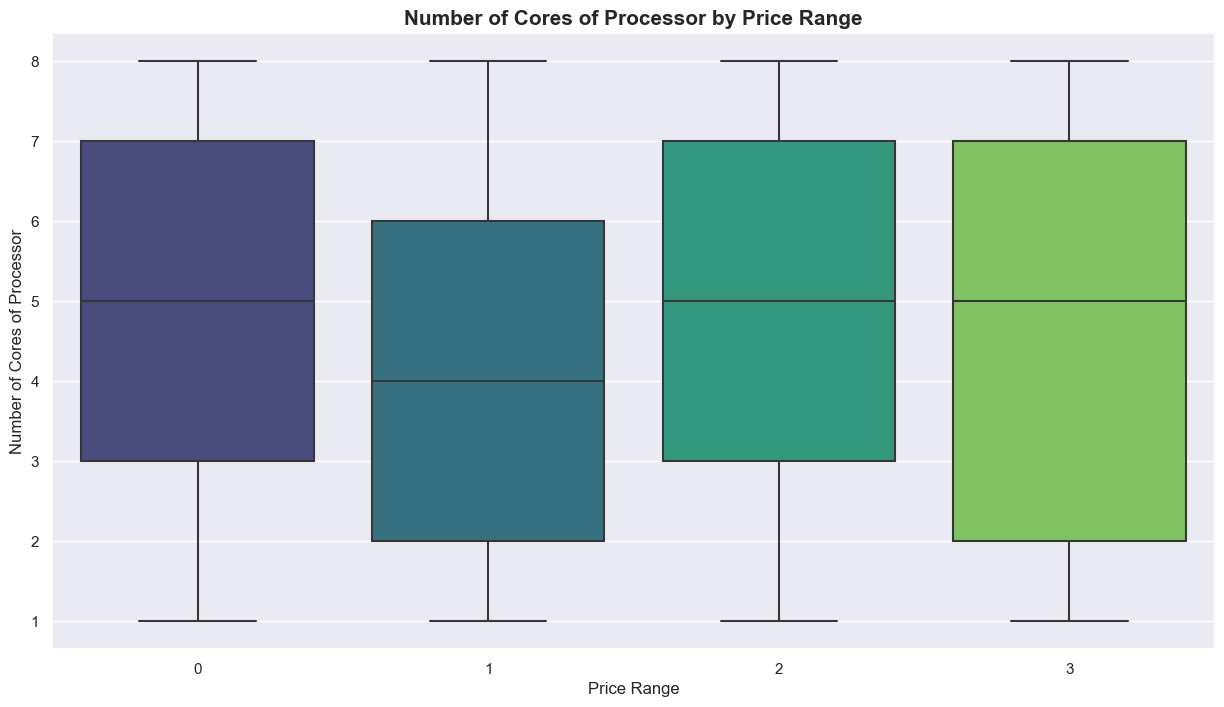

In [41]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='n_cores', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Cores of Processor')
ax.set_title('Number of Cores of Processor by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Mobile Weight based on Price Range :

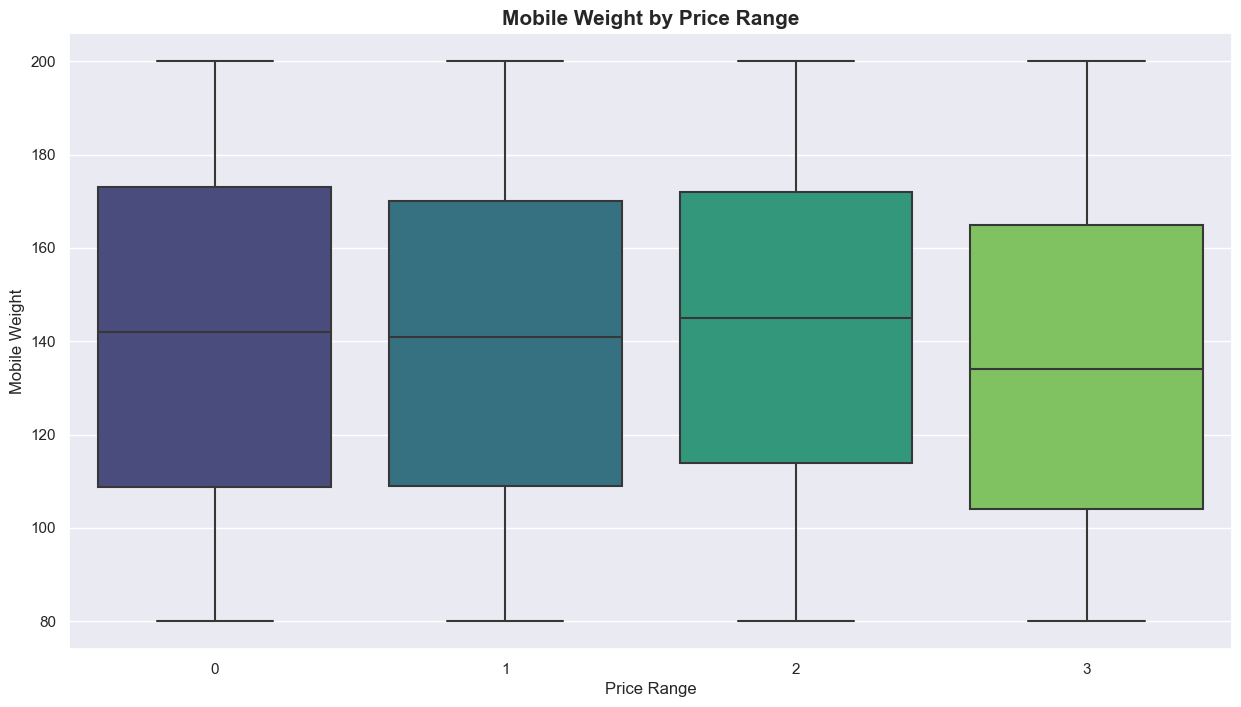

In [42]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df, x='price_range', y='mobile_wt', palette='viridis')
ax.set_xlabel('Price Range')
ax.set_ylabel('Mobile Weight')
ax.set_title('Mobile Weight by Price Range',fontsize=15,weight='bold')
plt.show()

### ~  Analysing Wifi availability and unavailability based on price range :

In [43]:
df1=df[df['wifi']==1] # Wifi availability
df0=df[df['wifi']==0] # Wifi unavailability

Text(0.5, 1.0, ' Wifi availability  by the price range ')

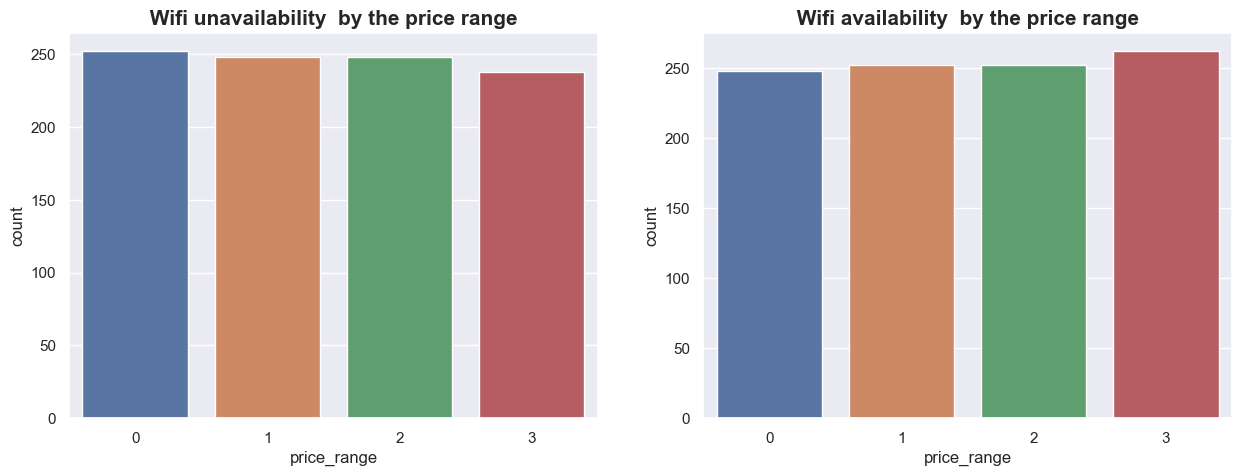

In [44]:
# Ploting the wifi unavailability  by the price range 

plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['price_range'])
plt.title(' Wifi unavailability  by the price range ',fontsize=15,weight='bold')

# Ploting the wifi availability  by the price range 

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['price_range'])
plt.title(' Wifi availability  by the price range ',fontsize=15,weight='bold')

### ~  Finding the inch of the screen :

In [45]:
 df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2)) / 2.54

### ~  Converting the screen size from cm to inches :

In [46]:
df['sc_size'] = df['sc_size'].round(2) 

### ~  Screen Size based on price range :

Text(0.5, 1.0, 'sc_size  by the price range ')

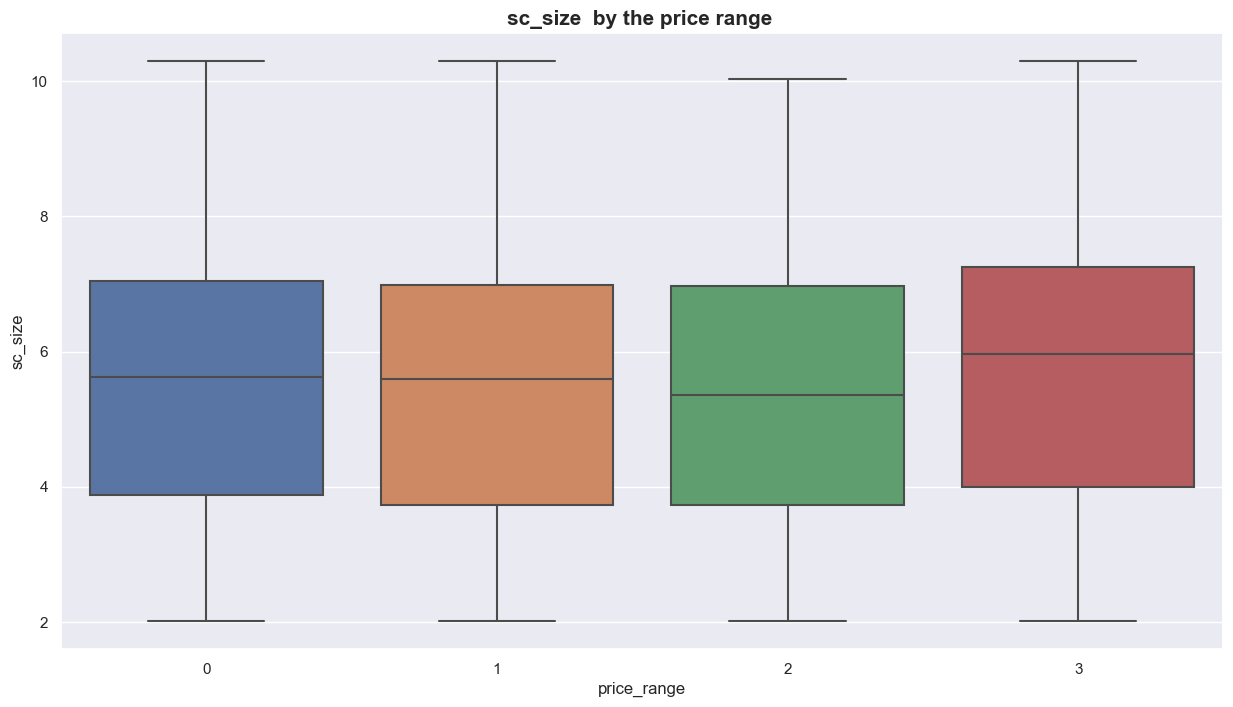

In [47]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='price_range', y='sc_size')
plt.title('sc_size  by the price range ',fontsize=15,weight='bold')

### ~  Analysing three_g  availability and unavailability based on price range :

In [48]:
df1=df[df['three_g']==1] # three_g availability
df0=df[df['three_g']==0] # three_g unavailability

Text(0.5, 1.0, ' three_g availability  by the price range ')

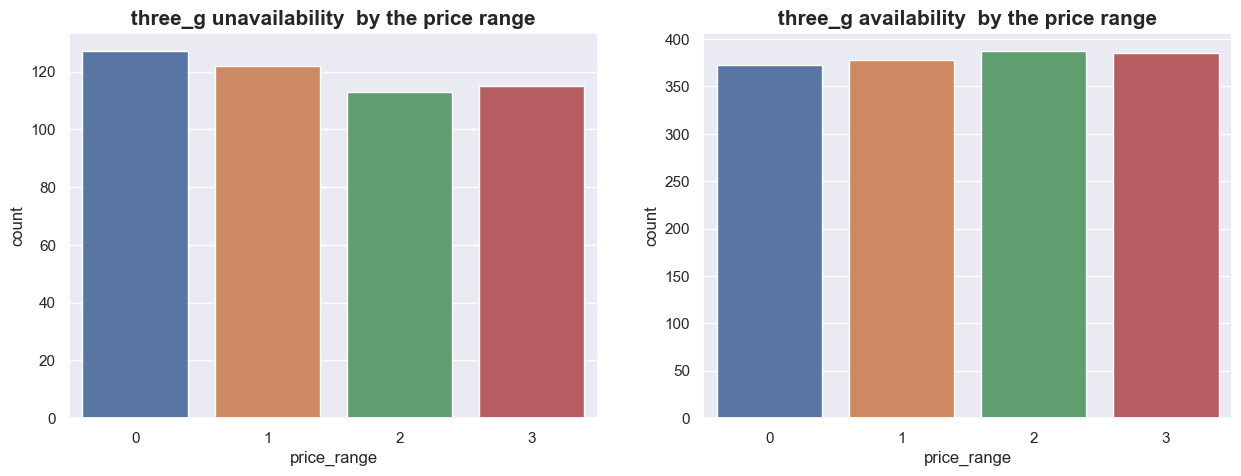

In [49]:
# Ploting the three_g unavailability  by the price range 

plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['price_range'])
plt.title(' three_g unavailability  by the price range ',fontsize=15,weight='bold')

# Ploting the three_g availability  by the price range 

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['price_range'])
plt.title(' three_g availability  by the price range ',fontsize=15,weight='bold')

### ~  Analysing four_g availability and unavailability based on price range :

In [50]:
df1=df[df['four_g']==1] # four_g availability
df0=df[df['four_g']==0] # four_g unavailability

Text(0.5, 1.0, ' four_g availability  by the price range ')

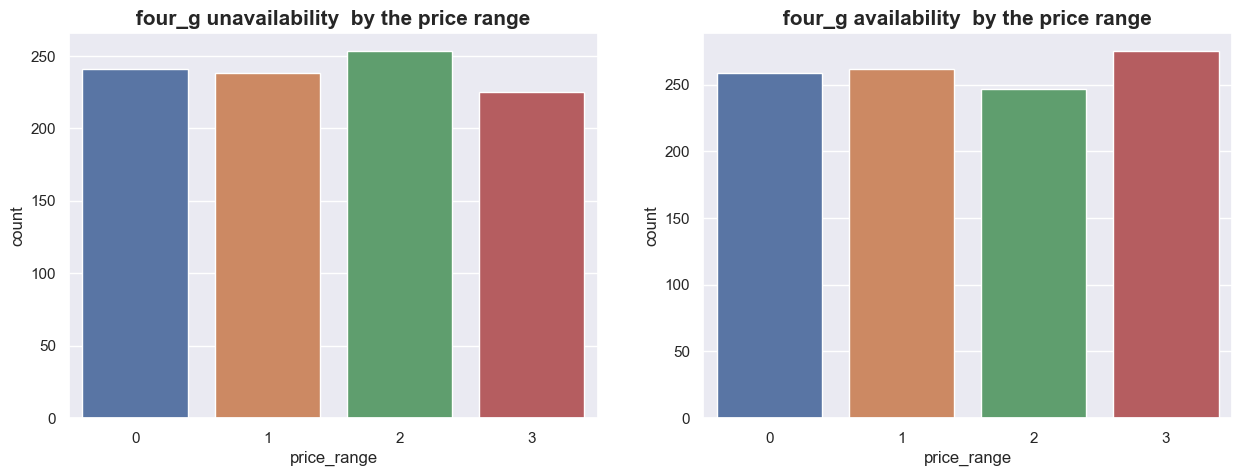

In [51]:
# Ploting the four_g unavailability  by the price range 

plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['price_range'])
plt.title(' four_g unavailability  by the price range ',fontsize=15,weight='bold')

# Ploting the four_g availability  by the price range 

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['price_range'])
plt.title(' four_g availability  by the price range ',fontsize=15,weight='bold')

## Finding correlation :

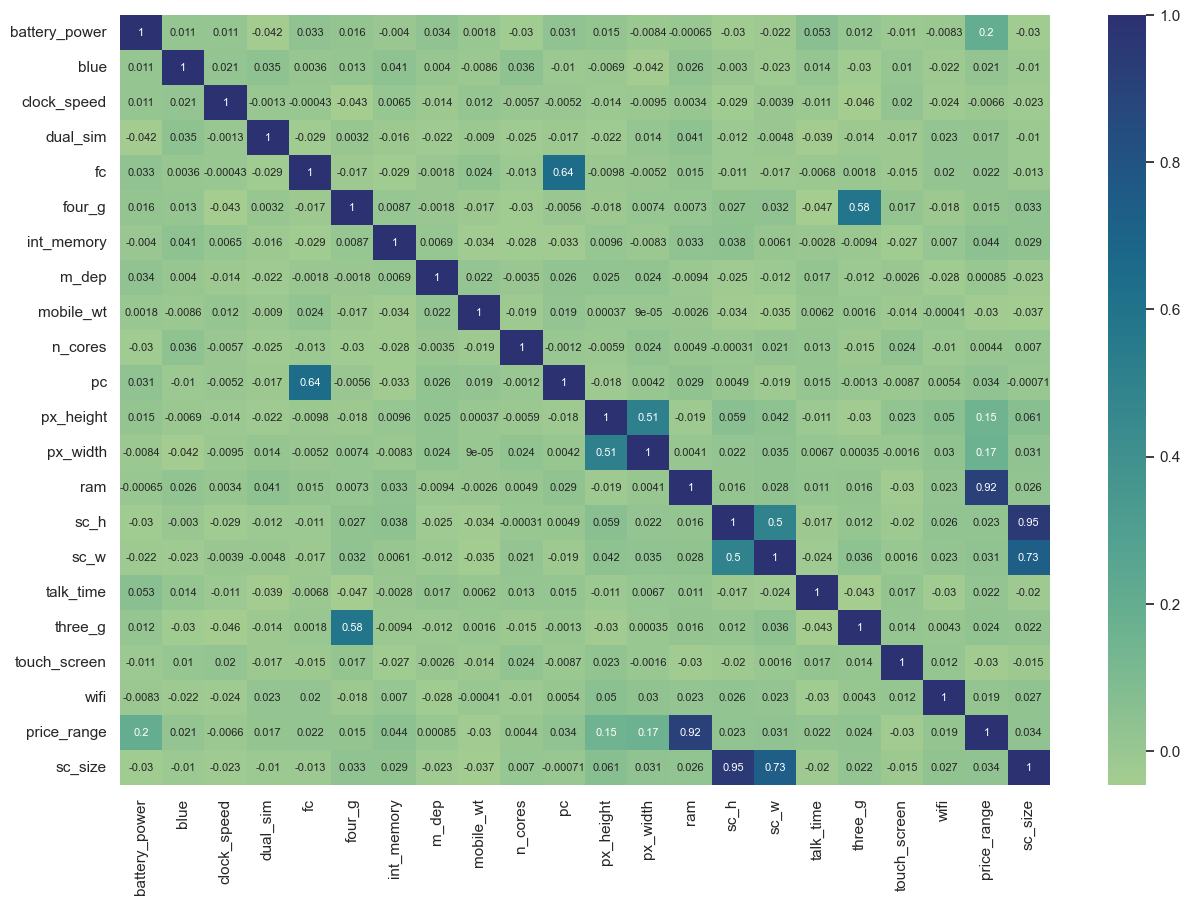

In [52]:
plt.figure(figsize=[15, 10])
sns.heatmap(df.corr(), cmap='crest', annot=True, annot_kws={'fontsize': 8})
plt.show()

In [53]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_size'],
      dtype='object')

In [54]:
Continuous = df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_size']]

In [55]:
df.talk_time.unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8], dtype=int64)

### ~  Visualising The Variables For Any Outliers :

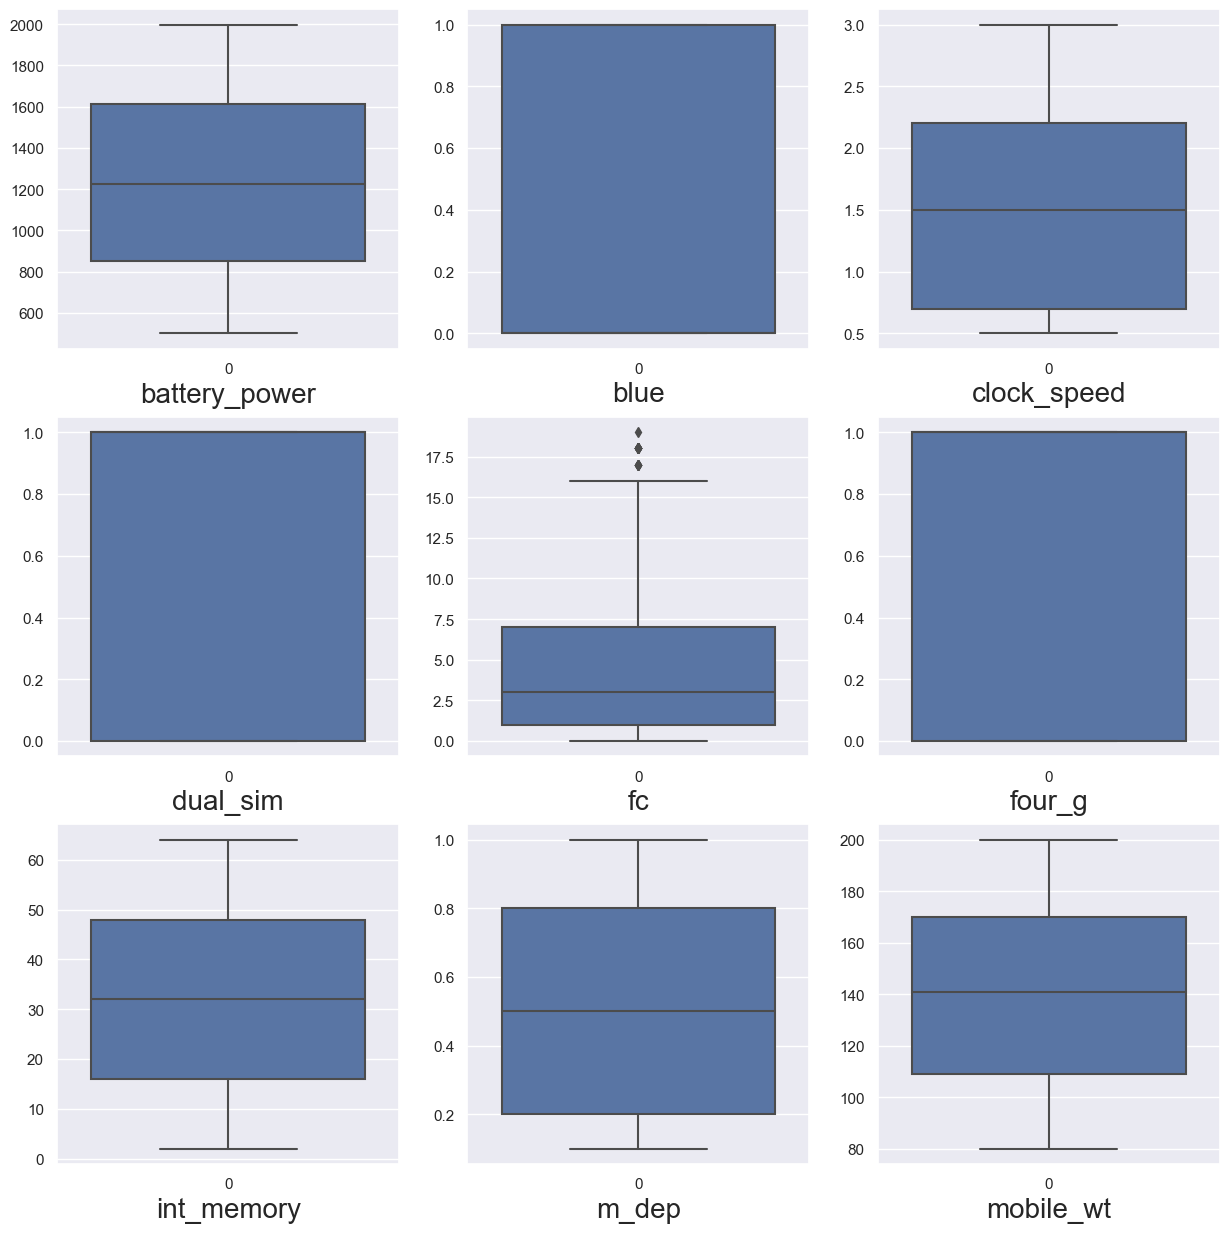

In [56]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<Axes: xlabel='fc'>

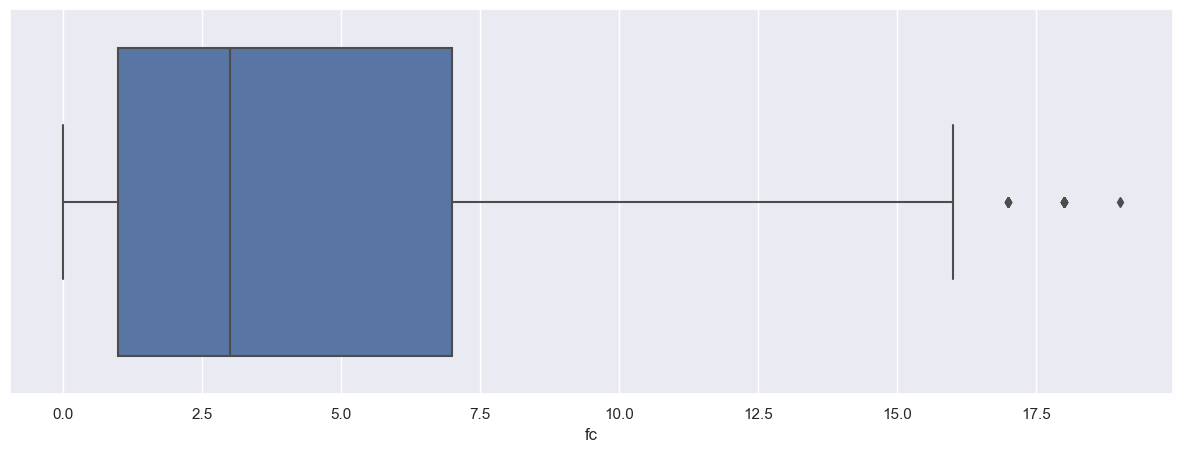

In [57]:
sns.boxplot(df,x='fc')

## Finding Outliers Using Z-Score :

##### We will be taking the values inside the range of -3 to +3 standard deviation

### ~  Finding out the Limits for fc :

In [58]:
upper_limit = df['fc'].mean()+3*df['fc'].std()
lower_limit = df['fc'].mean()-3*df['fc'].std()
print(upper_limit)
print(lower_limit)

17.33383124395165
-8.71483124395165


### ~  Finding out the Outliers in fc :

In [59]:
df.loc[(df['fc']>upper_limit) | (df['fc']<lower_limit)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,1179,3616,13,5.0,12,1,1,1,3,5.48
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,517,3388,6,4.0,16,1,1,1,3,2.84
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1942,955,18,11.0,7,1,1,1,1,8.31
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1393,2520,8,2.0,11,1,0,1,2,3.25
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,1039,1220,9,3.0,20,0,1,0,1,3.73
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,1144,593,9,4.0,18,1,1,1,0,3.88
1554,1957,0,1.2,1,18,1,36,0.8,151,2,...,1727,1115,16,2.0,18,1,0,1,1,6.35
1693,695,0,0.5,0,18,1,12,0.6,196,2,...,1829,2855,16,13.0,7,1,1,1,2,8.12
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,742,879,16,2.0,8,1,0,0,0,6.35
1880,1720,0,1.6,0,18,1,2,0.8,188,5,...,896,2522,10,5.0,2,1,0,1,2,4.40


### ~  Handling the outliers in fc :

##### Replacing the oulier values to fc's median :

In [60]:
df.loc[(df['fc']>upper_limit) | (df['fc']<lower_limit),'fc']=df['fc'].median()

# 4. Train Test Split

In [61]:
X = df.drop('price_range',axis=1)
Y = df['price_range']

In [62]:
X.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,3.25


In [63]:
Y.head(5)

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 21) (1600, 21) (400, 21)


## Feature Normalization :

In [66]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5.Model Fitting

## I. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

log= LogisticRegression()

In [68]:
log.fit(X_train, Y_train)

LogisticRegression()

In [69]:
Y_pred = log.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.9425

In [71]:
X_train_predict = log.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

X_test_predict = log.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

print(train_acc)
print(test_acc)

0.9375
0.9425


## II. Naive Bayes :

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [73]:
nb.fit(X_train, Y_train)

GaussianNB()

In [74]:
Y_pred_nb = nb.predict(X_test)

In [75]:
accuracy_score(Y_test, Y_pred_nb)

0.8025

In [76]:
X_train_predict = nb.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

X_test_predict = nb.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

print(train_acc)
print(test_acc)

0.816875
0.8025


## III. Support Vector Machine (SVM) :

In [77]:
from sklearn import svm
sv = svm.SVC(kernel='linear')

In [78]:
sv.fit(X_train, Y_train)

SVC(kernel='linear')

In [79]:
Y_pred_sv = sv.predict(X_test)

In [80]:
accuracy_score(Y_test, Y_pred_sv)

0.9625

In [81]:
X_train_predict = sv.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

X_test_predict = sv.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

print(train_acc)
print(test_acc)

0.950625
0.9625


## IV. K Nearest Neighbors :

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
score = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    score.append(accuracy_score(Y_test, Y_pred_knn))
    
score

[0.405,
 0.3825,
 0.39,
 0.385,
 0.41,
 0.4125,
 0.4175,
 0.4175,
 0.44,
 0.4275,
 0.4125,
 0.45,
 0.4475,
 0.4375,
 0.4625,
 0.475,
 0.47,
 0.46,
 0.4625]

In [84]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_score(Y_test, Y_pred_knn)

0.47

## V. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
DT = DecisionTreeClassifier()

In [87]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [88]:
Y_pred_DT = DT.predict(X_test)

In [89]:
accuracy_score(Y_test, Y_pred_DT)

0.835

## VI. Random Forest :

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RF = RandomForestClassifier()

In [92]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [93]:
Y_pred_RF = RF.predict(X_test)

In [94]:
accuracy_score(Y_test, Y_pred_RF)

0.895

## VII. XGBOOST :

In [95]:
import xgboost as xgb

In [96]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
Y_pred_xgb_model = xgb_model.predict(X_test)

In [98]:
accuracy_score(Y_test, Y_pred_xgb_model)

0.905

# 6. Output Final Score :

In [99]:
df2 = pd.DataFrame({'Models':['LR','NB','SVM','KNN','DT','RF','XGB'],
                        'ACC':[accuracy_score(Y_test, Y_pred),
                              accuracy_score(Y_test, Y_pred_nb),
                              accuracy_score(Y_test, Y_pred_sv),
                              accuracy_score(Y_test, Y_pred_knn),
                              accuracy_score(Y_test, Y_pred_DT),
                              accuracy_score(Y_test, Y_pred_RF),
                              accuracy_score(Y_test, Y_pred_xgb_model)]})

In [100]:
df2

,Models,ACC
0,LR,0.9425
1,NB,0.8025
2,SVM,0.9625
3,KNN,0.4700
4,DT,0.8350
5,RF,0.8950
6,XGB,0.9050


<Axes: xlabel='Models', ylabel='ACC'>

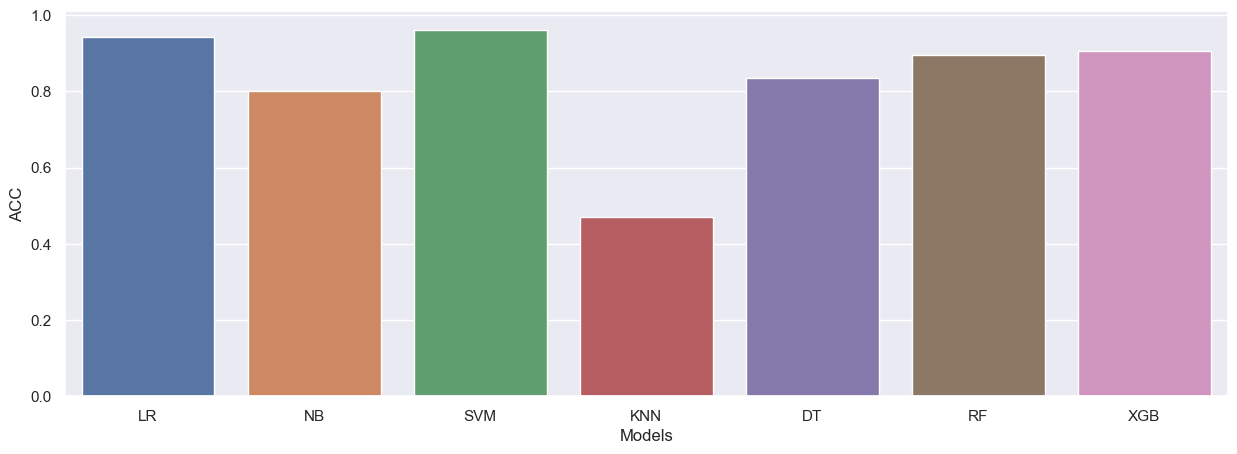

In [101]:
sns.barplot(x=df2['Models'],y=df2['ACC'])

In [102]:
log = LogisticRegression()
log.fit(X, Y)

LogisticRegression()

In [103]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'sc_size'],
      dtype='object')

# Final Prediction :

In [104]:
new_df = pd.DataFrame({'battery_power': 842,
                       'blue': 0,
                       'clock_speed': 2.2, 
                       'dual_sim': 0, 
                       'fc': 1, 
                       'four_g': 0,
                       'int_memory': 7, 
                       'm_dep': 0.6, 
                       'mobile_wt': 188, 
                       'n_cores': 2, 
                       'pc': 2, 
                       'px_height': 20.0,
                       'px_width':756 , 
                       'ram': 2549, 
                       'sc_h': 9, 
                       'sc_w':7.0 , 
                       'talk_time': 19, 
                       'three_g': 0,
                       'touch_screen': 0, 
                       'wifi': 1, 
                       'sc_size': 4.49 
},index=[0])

In [105]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7.0,19,0,0,1,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3.0,7,1,1,0,2,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2.0,9,1,1,0,2,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8.0,11,1,0,0,2,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2.0,15,1,1,0,1,3.25


In [106]:
log.predict(new_df)

array([1], dtype=int64)